# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer

# Start Experiment Runner

In [3]:
req = cts.ICAO_REQ.MOUTH
ds = GTName.FVC
aligned = True
aligned_str = 'aligned' if aligned else 'not_aligned'
model_name = f'{ds.value.lower()}_{aligned_str}/{req.value.lower()}'

df = pd.read_csv('analysis/single_task_exps/processed_experiments_data.csv')
model_exp_id = df[(df.property_icao_reqs.str.contains(req.value.lower())) & \
                   (df.property_aligned == aligned) & \
                  (df.property_gt_names.str.contains(ds.value.lower()))].id.values[0]

src_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk('src') for f in filenames if os.path.splitext(f)[1] == '.py']
src_files = [x for x in src_files if 'ipynb' not in x]

kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': f'Training network for {req.value.upper()} requisite',
        'tags': ['vgg16', 'ground truths', 'adamax', ds.value.lower(), 'binary_output', req.value.lower(),
                 'single_task', f'{model_exp_id}'],
        'src_files': src_files
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        #'reqs': list(cts.ICAO_REQ),
        'reqs': [req],
        'aligned': aligned,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [ds]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': False,
        'model_name': f'single_task/{model_name}',
        'orig_model_experiment_id': model_exp_id,
        'sample_training_data': False,
        'sample_prop': 1.
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 2,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 6145
Process ID: 91938
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training network for MOUTH requisite',
                'name': 'train_vgg16',
                'src_files': ['src/data_processor.py',
                              'src/model_trainer.py',
                              'src/exp_runner.py',
                              'src/model_evaluator.py',
                              'src/exp_runner_script.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'fvc',
                         'binary_output',
                         'mouth',
                         'single_task',
                         'IC-376']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': 

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4926, 4)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 4)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 4)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4926 validated image filenames belonging to 2 classes.
Found 547 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
TOTAL: 5761


# Use Neptune

In [8]:
runner.start_neptune()
runner.create_experiment()

-------------------- start neptune -------------------
Not using Neptune
-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3612 (73.33%)
N_TRAIN_NOT_COMP: 1314 (26.67%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 408 (74.59%)
N_VALIDATION_NOT_COMP: 139 (25.41%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 222 (77.08%)
N_TEST_NOT_COMP: 66 (22.92%)
N_TEST_DUMMY: 0 (0.0%)
----


In [10]:
runner.summary_gen_labels_dist()

-------------------- summary gen labels dist -------------------
GEN_N_TRAIN_COMP: 3612 (73.33%)
GEN_N_TRAIN_NON_COMP: 1314 (26.67%)
GEN_N_TRAIN_DUMMY: 0 (0.0%)
GEN_N_VALID_COMP: 408 (74.59%)
GEN_N_VALID_NON_COMP: 139 (25.41%)
GEN_N_VALID_DUMMY: 0 (0.0%)
GEN_N_TEST_COMP: 222 (77.08%)
GEN_N_TEST_NON_COMP: 66 (22.92%)
GEN_N_TEST_DUMMY: 0 (0.0%)


# Create Model

In [11]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

# Training Model

In [12]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
Epoch 1/2
76/76 [==============================] - 55s 632ms/step - loss: 0.5142 - accuracy: 0.7622 - val_loss: 0.2950 - val_accuracy: 0.8828
Epoch 2/2
76/76 [==============================] - 38s 496ms/step - loss: 0.3782 - accuracy: 0.8491 - val_loss: 0.2447 - val_accuracy: 0.9141


# Plots

-------------------- draw training history -------------------


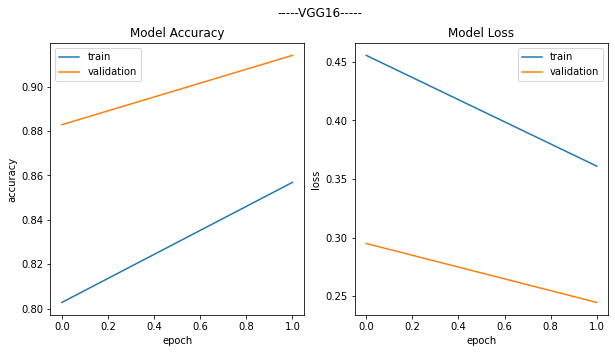

In [13]:
runner.draw_training_history()

# Load Best Model

In [14]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [15]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

-------------------- test model -------------------
Testing Trained Model
Predicting labels....
9/9 [==============================] - 7s 862ms/step
Prediction finished!
Requisite: MOUTH


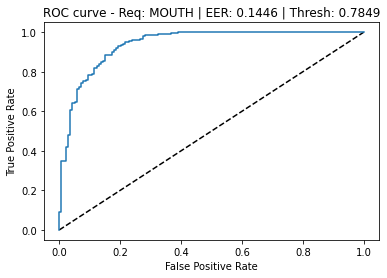

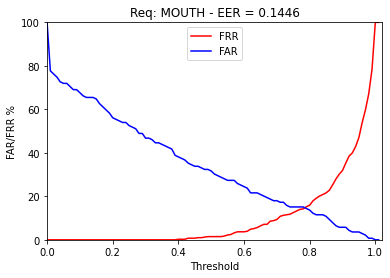

Requisite: ICAO_REQ.MOUTH - EER: 14.46% - Best Threshold: 0.7849
Classification report -----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       139
           1       0.95      0.86      0.90       408

    accuracy                           0.86       547
   macro avg       0.81      0.86      0.82       547
weighted avg       0.88      0.86      0.86       547

Accuracy ------------------------------------------------
Model Accuracy: 85.56%
---------------------------------------------------------
Confusion matrix ----------------------------------------
FAR: 14.39% | FRR: 14.46% | TP: 349 | TN: 119 | FP: 20 | FN: 59


In [16]:
runner.test_model(data_src='validation')

### Vizualize Model Classification

-------------------- vizualize predictions -------------------


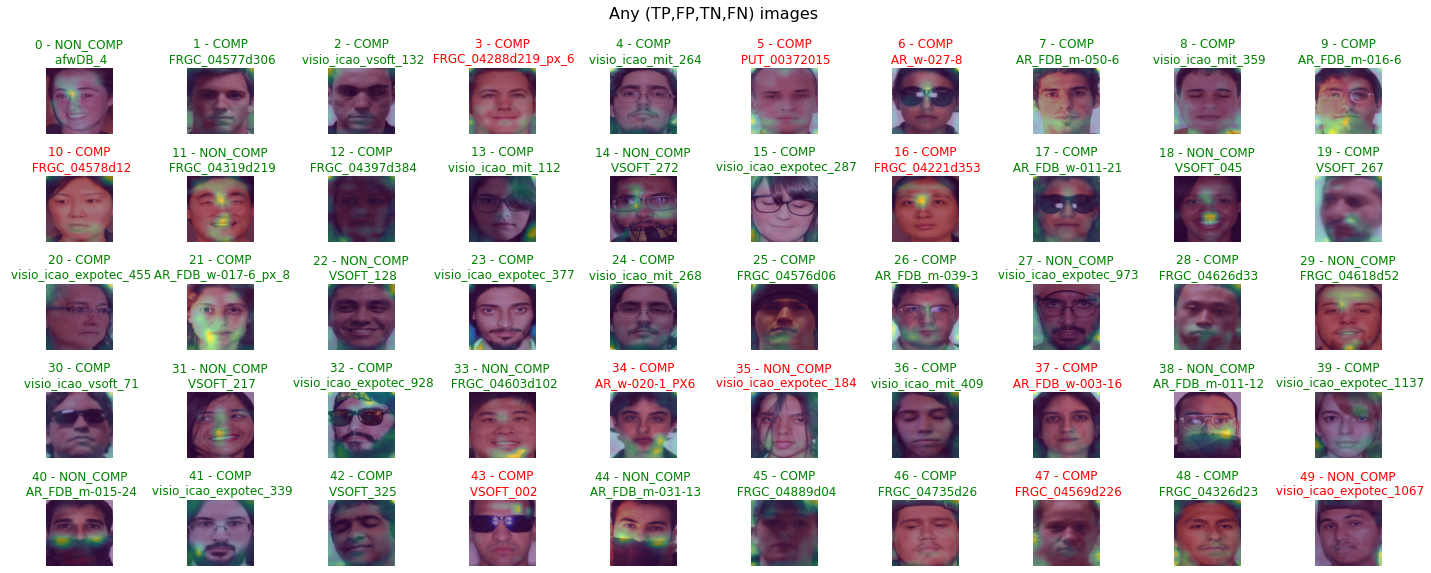

In [17]:
runner.vizualize_predictions(data_src='validation', n_imgs=50)

#### False Positives

-------------------- vizualize predictions -------------------


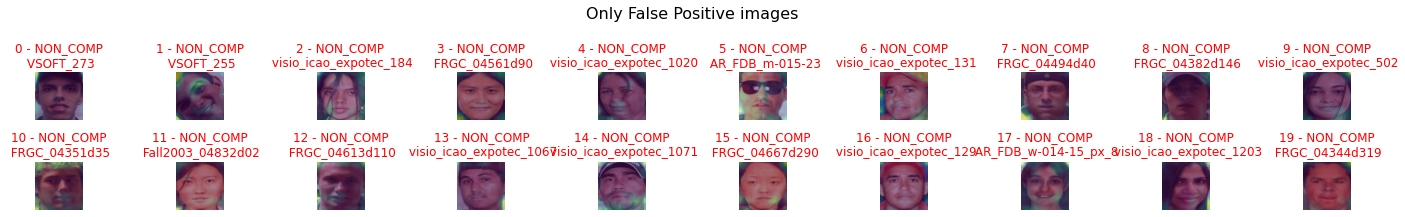

In [18]:
runner.vizualize_predictions(data_src='validation', n_imgs=50, show_only_fp=True)

#### False Negatives

-------------------- vizualize predictions -------------------


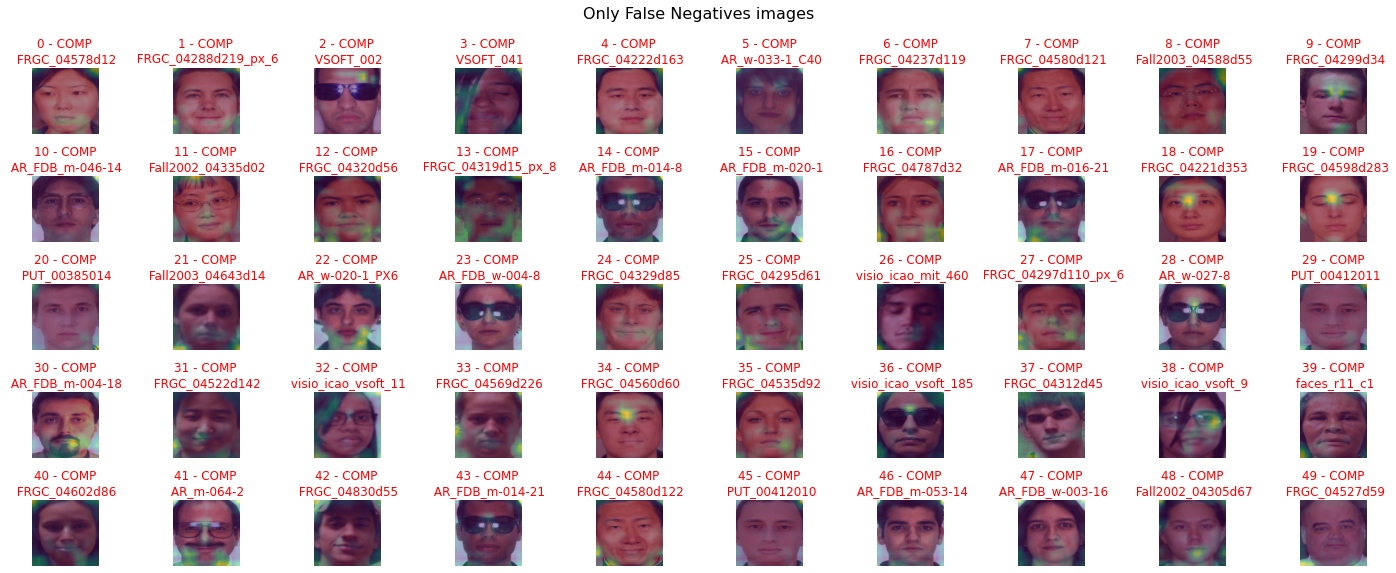

In [19]:
runner.vizualize_predictions(data_src='validation', n_imgs=50, show_only_fn=True)

#### True Positives

-------------------- vizualize predictions -------------------


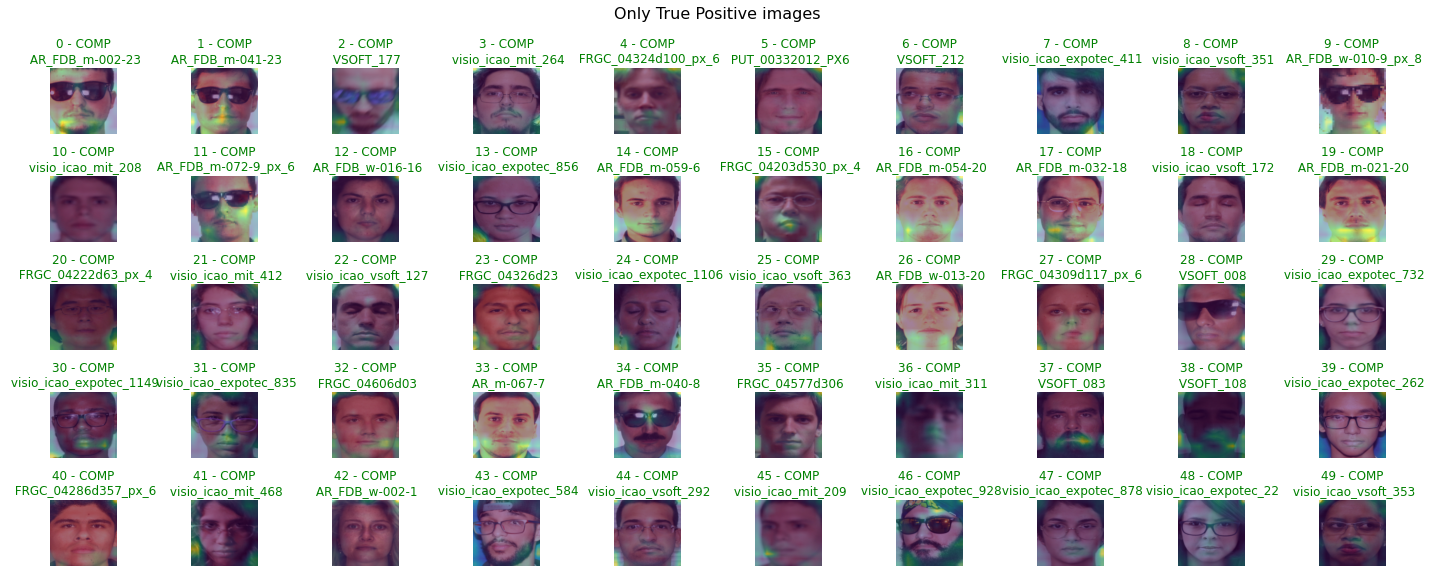

In [20]:
runner.vizualize_predictions(data_src='validation', n_imgs=50, show_only_tp=True)

#### True Negatives

-------------------- vizualize predictions -------------------


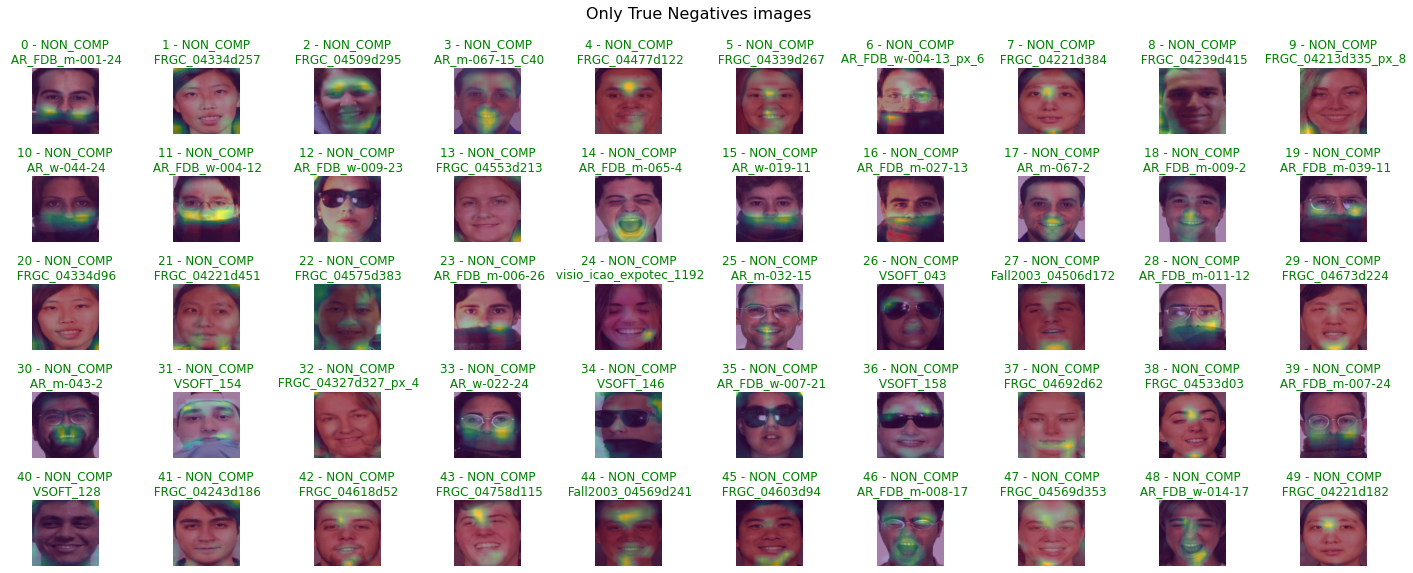

In [21]:
runner.vizualize_predictions(data_src='validation', n_imgs=50, show_only_tn=True)

## Test Split

-------------------- test model -------------------
Testing Trained Model
Predicting labels....
5/5 [==============================] - 6s 2s/step
Prediction finished!
Requisite: MOUTH


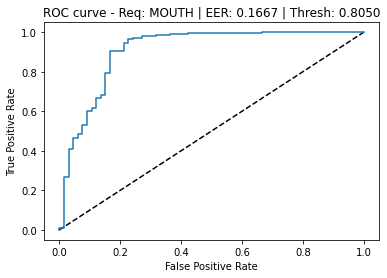

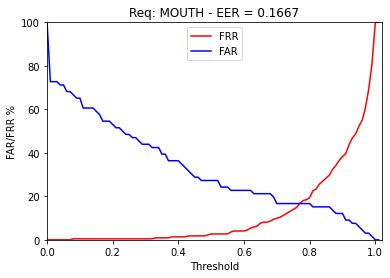

Requisite: ICAO_REQ.MOUTH - EER: 16.669999999999998% - Best Threshold: 0.805
Classification report -----------------------------------
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        66
           1       0.95      0.79      0.86       222

    accuracy                           0.81       288
   macro avg       0.75      0.82      0.76       288
weighted avg       0.86      0.81      0.82       288

Accuracy ------------------------------------------------
Model Accuracy: 80.56%
---------------------------------------------------------
Confusion matrix ----------------------------------------
FAR: 15.15% | FRR: 20.72% | TP: 176 | TN: 56 | FP: 10 | FN: 46


In [22]:
runner.test_model()

### Vizualize Model Classification

-------------------- vizualize predictions -------------------


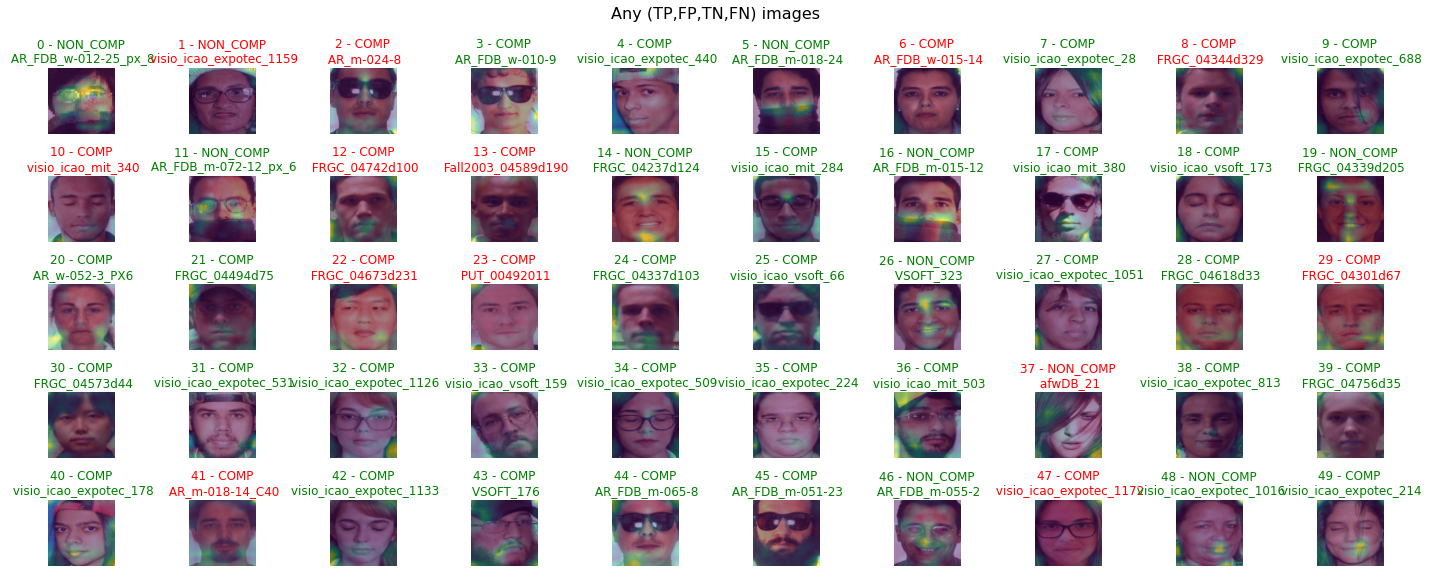

In [23]:
runner.vizualize_predictions(n_imgs=50)

#### False Positives

-------------------- vizualize predictions -------------------


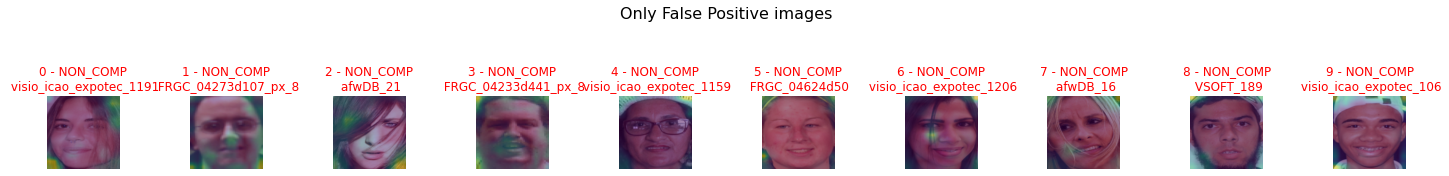

In [24]:
runner.vizualize_predictions(n_imgs=50, show_only_fp=True)

#### False Negatives

-------------------- vizualize predictions -------------------


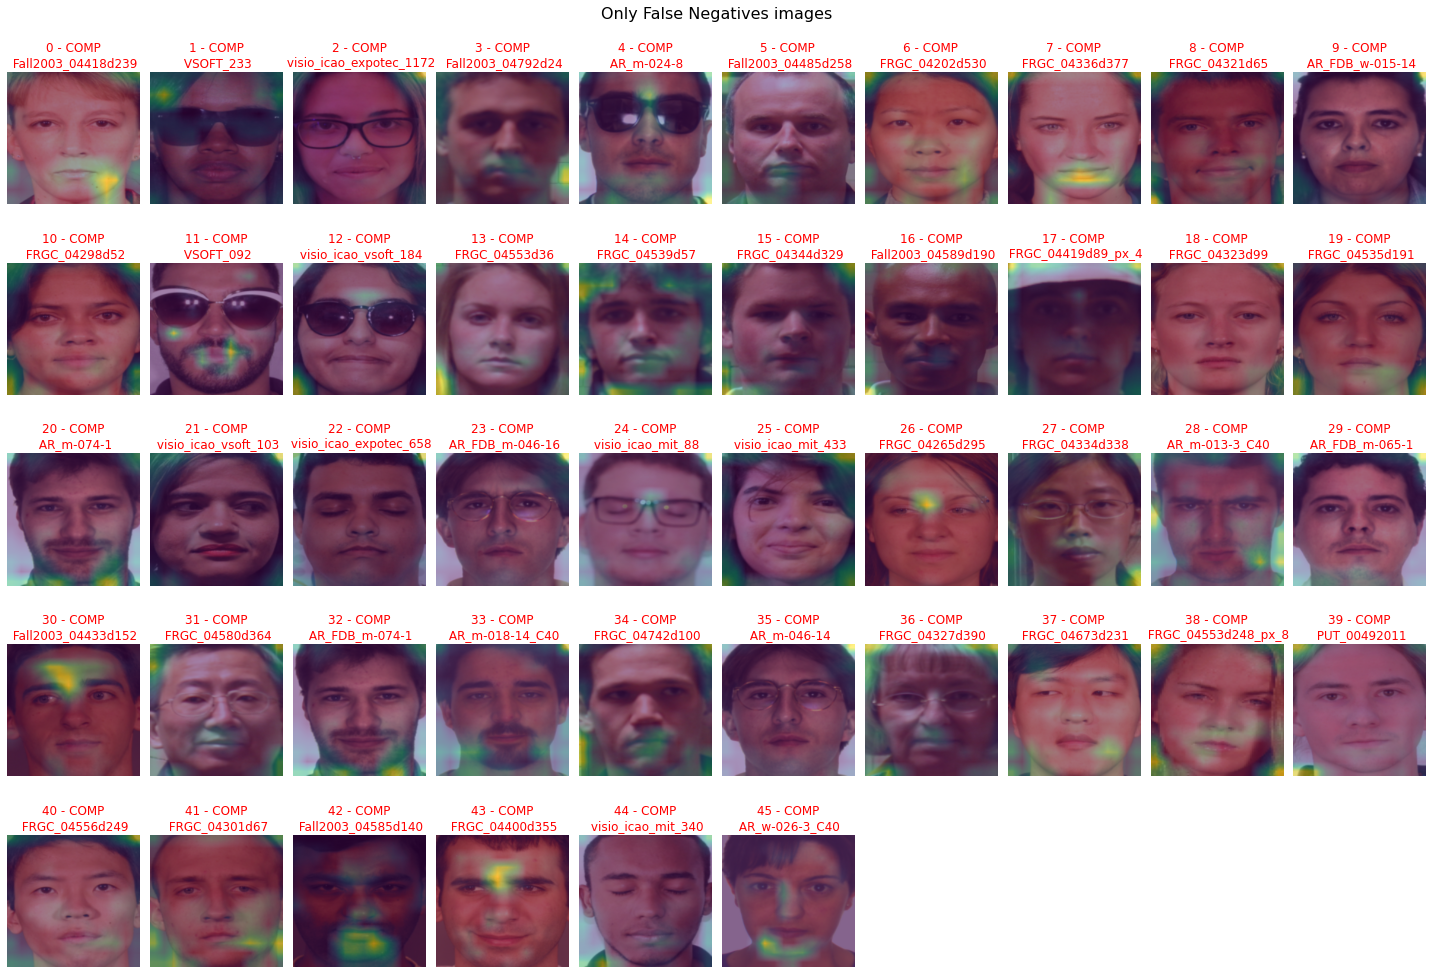

In [25]:
runner.vizualize_predictions(n_imgs=50, show_only_fn=True)

#### True Positives

-------------------- vizualize predictions -------------------


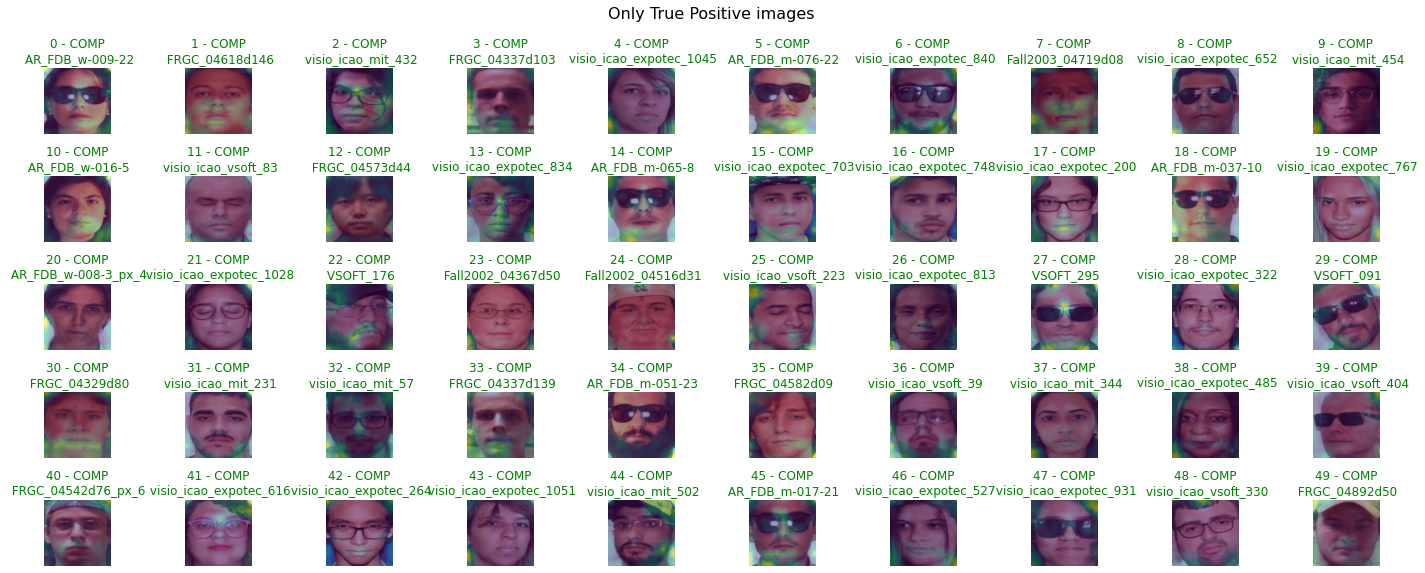

In [26]:
runner.vizualize_predictions(n_imgs=50, show_only_tp=True)

#### True Negatives

-------------------- vizualize predictions -------------------


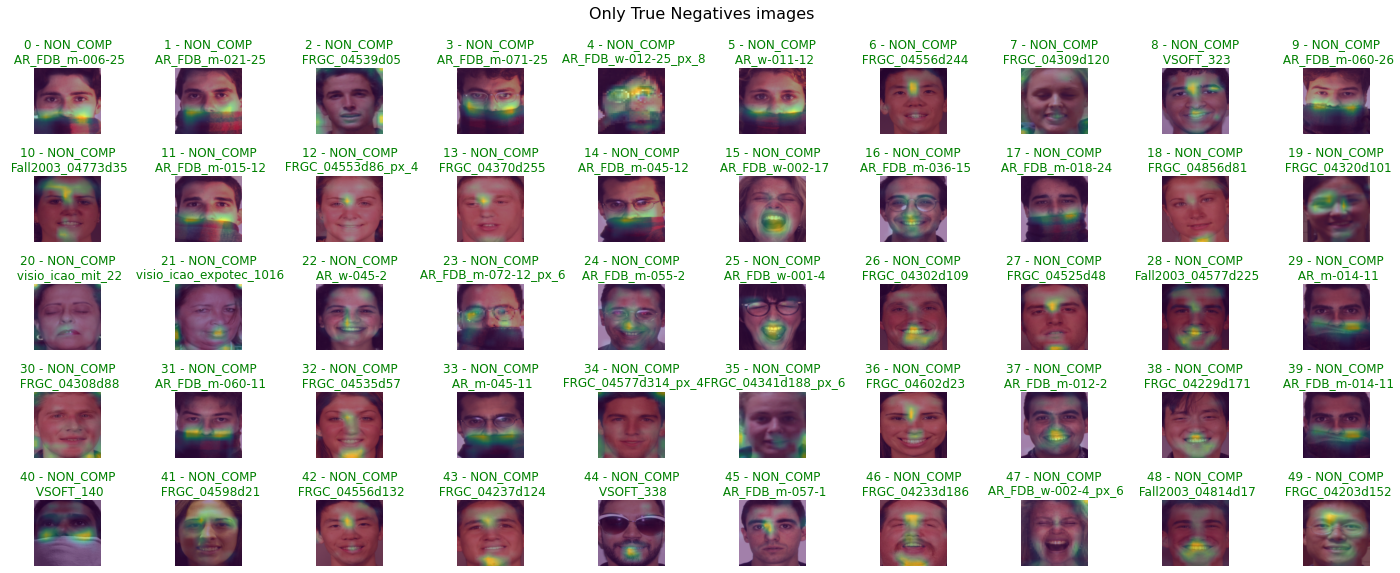

In [27]:
runner.vizualize_predictions(n_imgs=50, show_only_tn=True)

# Finishing Experiment Manager

In [28]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Not using Neptune
